#  Titanic Survival Prediction at Beginner Level

I have putforth a solution with guidance from various notebooks, blogs and ofcourse stack overflow website. Please feel free to glance over the analysis and do recommend any suggestions and queries.

A Kaggle Competition use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**The Challenge**

* The sinking of the Titanic is one of the most infamous shipwrecks in history.
* On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

* While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**Contents**



1. Import Libraries
2. Explore Dataset
4. Data Visualization
5. Cleaning Data and Dealing with Missing Data
6. Add New Features
6. Building Models
7. Choosing the best model
8. Create Submission File

In [ ]:
# !pip install plotly pandas


## Import Libraries

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings


Upload necessary csv files.

In [ ]:
# #Upload CSV files
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# train_df = pd.read_csv("C:/Users/Raghu/Downloads/Datasets only/Titanic Datasets/train.csv") # C:/Users/Raghu/Downloads/Datasets only/Titanic Datasets
# test_df = pd.read_csv("C:/Users/Raghu/Downloads/Datasets only/Titanic Datasets/test.csv") # C:/Users/Raghu/Downloads/Datasets only/Titanic Datasets

In [ ]:
train_df = pd.read_csv("https://raw.githubusercontent.com/9394113857/Data-Sets/raghu/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/9394113857/Data-Sets/raghu/test.csv")

Assign it to respective DataFrame and check its dimensions

In [ ]:
print("Dimensions of train: {}".format(train_df.shape))
print("Dimensions of test: {}".format(test_df.shape))

Dimensions of train: (891, 12)
Dimensions of test: (418, 11)


In [ ]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


We can see that in train_df we are provided with the Survived Column, whereas test_df doesnt give us survival column

## Exploratory Data Analysis

In [ ]:
#Data Exploration
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


A Broader explanation of all the column names and its meaning is being given [here](https://www.kaggle.com/c/titanic/data) in tabular format.

The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects

In [ ]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* It can be observed that 38% survived with a mean age of 29 years.
* Also that Age column is continuous ranging from 0.4 to 80.
* Some Columns have missing values like Cabin, Ticket.

Let us check first few rows in train.csv.

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#From train dataset it is observed that it contains different types of data such as numeric data, categorical, continous, missing/NaN values, which need to be taken care of
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)



1. Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
2. Categorical Features: Survived, Sex, Embarked, Pclass
3.
Alphanumeric Features: Ticket, Cabin




As we can see, Cabin, Age , Embarked and Fare have missing data in them. We will find and fill missing values later in the notebook

## Data Visualization

### 1. Survived

* How many People Survived on the RMS Titanic?

For this let us look at the 'Survived Column' in our dataset. Use countplot to give a count of total survived people.

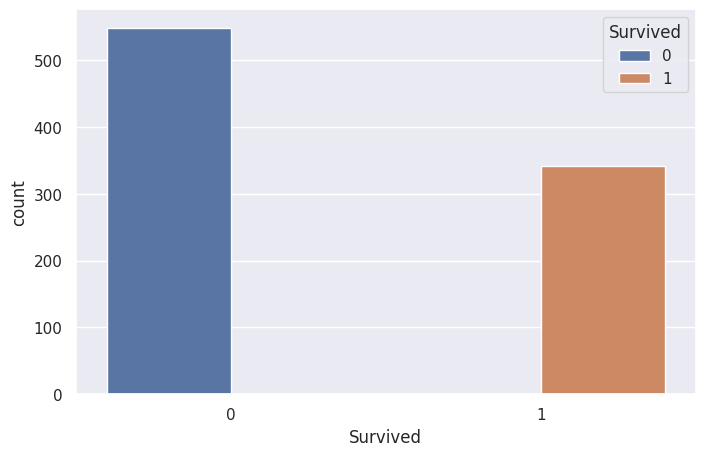

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize = (8, 5))
ax= sns.countplot(x='Survived', hue="Survived", data=train_df)


From the plot it is clear that survival chances of people on Titanic were quite low.

### 2. Sex

Consists of No of Female and Male passengers

* Which Gender outlived the other?
* Who had more chance of survival?

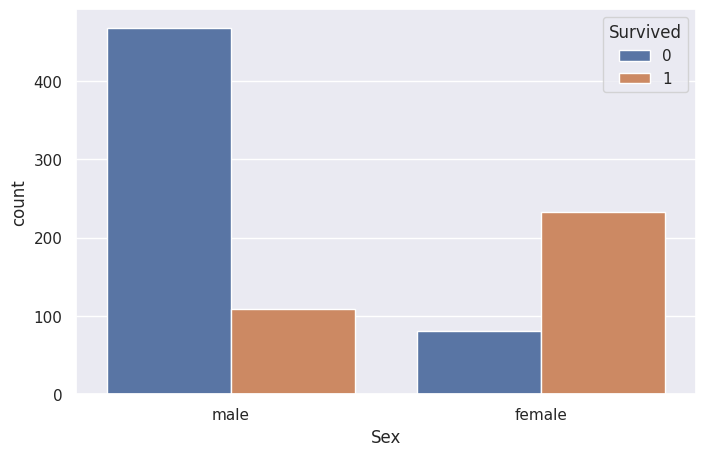

In [ ]:
plt.figure(figsize = (8, 5))
ax= sns.countplot(x='Sex', hue="Survived", data=train_df)


It was observed that Females were mostly rescued than Male passengers.

### 3. Pclass

Consists of three classes according to socio-economic status
1st = Upper
2nd = Middle
3rd = Lower


* Which class had higher survival ?
* Did the people of higher socio-economic make it alive or otherwise?


In [ ]:
#By using heatmap
group = train_df.groupby(['Pclass','Survived'])
pclass_survived = group.size().unstack()

<Axes: xlabel='Survived', ylabel='Pclass'>

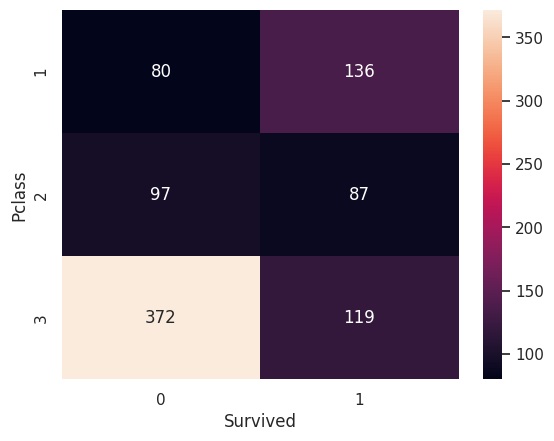

In [ ]:
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

The heatmap tells us that Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

### 4. Sex vs Age with respect to Survived Column

<Axes: xlabel='Sex', ylabel='Age'>

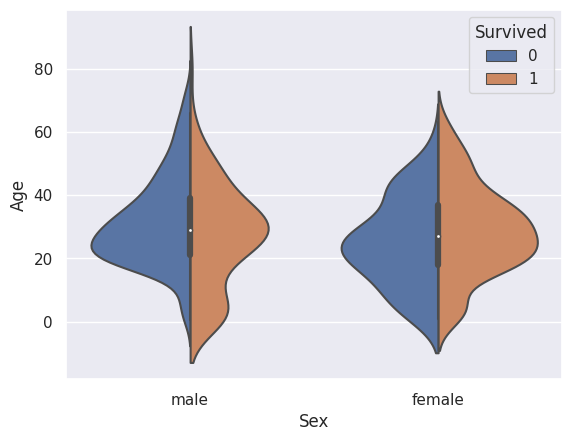

In [ ]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train_df, split = True)

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –

* Good for children.
* High for women in the age range 20-50.
* Less for men as the age increases.

### 5. Embarked

C = Cherbourg, Q = Queenstown, S = Southampton

* Which port has maximum boarding?
* Does this correlate with survival?


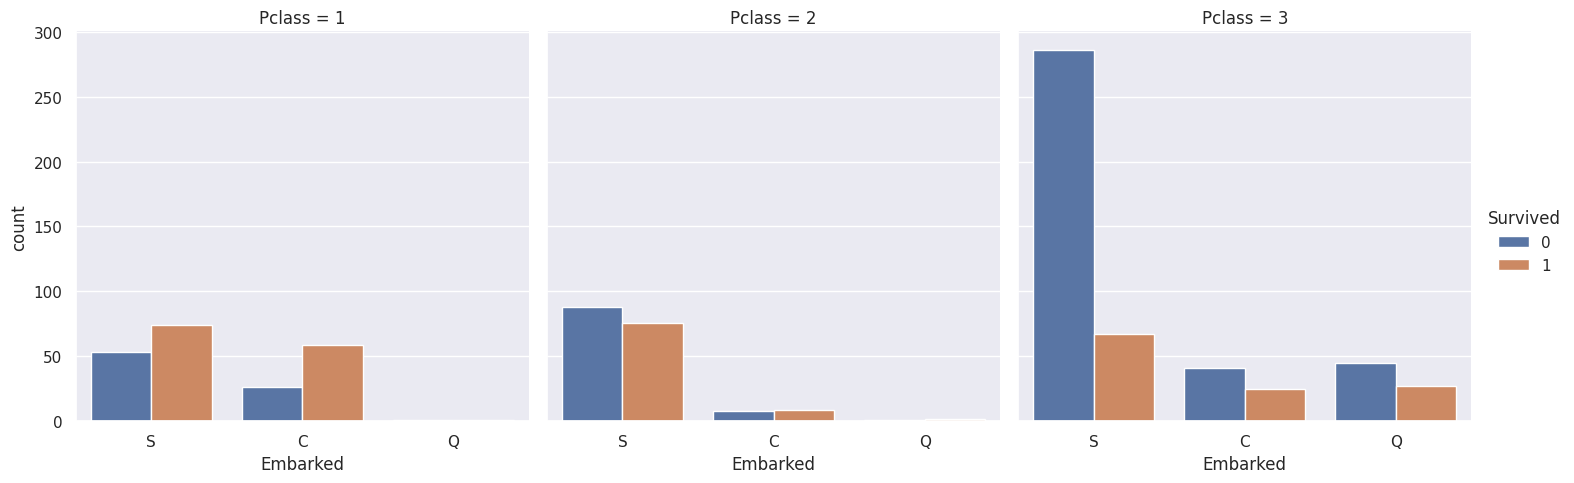

In [ ]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train_df)

### 6. Family.

In our dataset we had SipSp and Parch columns which told us about various family relations. So I thought it would be better to combine them into a single column named Family and get insights.

* What is the optimal Family size to survive the catastrophe?

In [ ]:
#Sibsp + Parch + Family, make them into Family COlumn
all_df = [train_df, test_df]

for i in all_df:
  i['Family'] = i['SibSp'] + i['Parch'] + 1


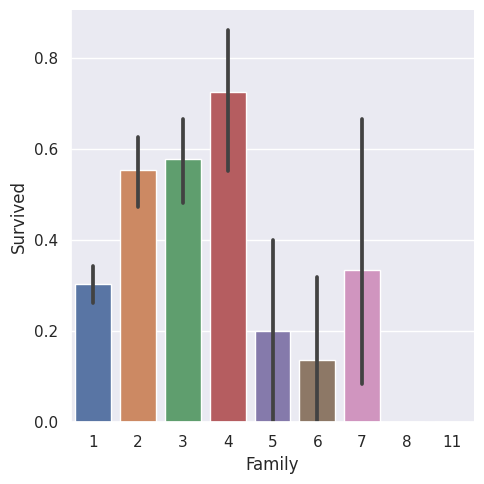

In [ ]:
import seaborn as sns

sns.catplot(x='Family', y='Survived', data=train_df, kind='bar')


If the family size is greater than 5, chances of survival decreases considerably

### 7. IsAlone

 It can be possible that some passengers might be travelling alone. So it is better to add IsAlone column.

In [ ]:
all_df = [train_df, test_df]

for data in all_df:
  data['IsAlone'] = 0
  data.loc[data['Family'] == 1, 'IsAlone'] = 1

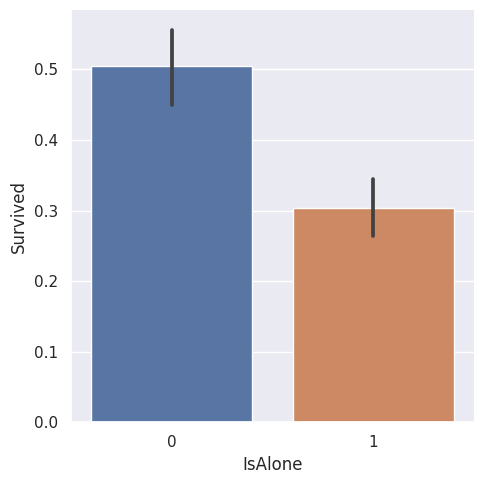

In [ ]:
import seaborn as sns

sns.catplot(x='IsAlone', y='Survived', data=train_df, kind='bar')


If a passenger is alone, the survival rate is less

### 8. Fare

As we have seen from data exploration that Fare is a continous column and also has some missing values. Hence, we wil group Fare values in an assigned group and visualize it.

In [ ]:
#So we will fill whose empty rows before doing computation.

all_df = [train_df, test_df]

for data in all_df:
  data['Fare'] = data['Fare'].fillna(data['Fare'].median())


<Axes: xlabel='Fare', ylabel='Survived'>

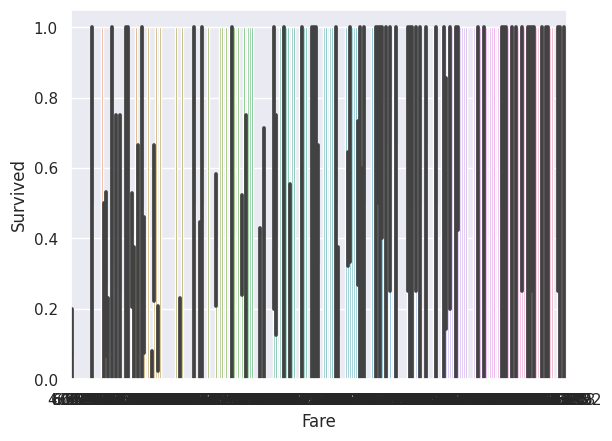

In [ ]:
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare', y ='Survived',  data = train_df)


 It can be concluded that if a passenger paid a higher fare, the survival rate is more.

In [ ]:
print( train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean() )

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [ ]:
print( train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean() )

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [ ]:
print( train_df[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean() )

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [ ]:
print( train_df[["Family","Survived"]].groupby(["Family"], as_index = False).mean() )

   Family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000


In [ ]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
train_df['category_fare'] = pd.qcut(train_df['Fare'], 4)
print( train_df[["category_fare","Survived"]].groupby(["category_fare"], as_index = False).mean() )

     category_fare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


## Cleaning the Data and Dealing with Missing Data

It can be seen that, Age, Cabin and Embarked have some NaN values
Cabin has more than 75% missing values, so it would be wise to drop it.

In [ ]:
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1 )

we can also drop the Ticket feature since it's unlikely to yield any useful information

In [ ]:
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

### 1. Clean Embarked

Let us check the counts of total passengers boarded from respective ports.

In [ ]:
print("Southampton(S):")
southampton = train_df[train_df['Embarked'] == 'S'].shape[0]
print(southampton)

print("Cherbourg(C):")
cherbourg = train_df[train_df['Embarked'] == 'C'].shape[0]
print(cherbourg)

print("Queenstown(Q):")
queenstown = train_df[train_df['Embarked'] == 'Q'].shape[0]
print(queenstown)

Southampton(S):
644
Cherbourg(C):
168
Queenstown(Q):
77


It can be observed that most people boarded from Southampton.

Replacing the missing values in the Embarked feature with 'S'.

In [ ]:
train_df = train_df.fillna({"Embarked": "S"})

In [ ]:
train_df.Embarked.isnull().sum()

0

### 2. Get Title from Name

Looking at the Name Column we can see many things. It contains the name of the passenger with its respective title.

For Example, Master title has Age mean of 5 years.

So let us extract the 'title' feature from the Name.

In [ ]:
all_df = [train_df, test_df]
titles = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4,'Rare':5}

for i in all_df:
  i['Title'] = i.Name.str.extract(' ([A-Za-z]+)/.', expand=False)
  i['Title'] = i['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major', 'Rev','Sir','Jonkheer','Dona'], 'Rare')
  i['Title'] = i['Title'].replace('Mlle', 'Miss')
  i['Title'] = i['Title'].replace('Ms', 'Miss')
  i['Title'] = i['Title'].replace('Mme', 'Mrs')
  # convert titles into numbers
  i['Title'] = i['Title'].map(titles)
  # filling NaN with 0, to get safe
  i['Title'] = i['Title'].fillna(0)



In [ ]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [ ]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0.0,0.383838


Numeric data is always easy to handle rather than string data. So I have converted the titles 'Mr, Miss, Rare' to integer data types for ease of use.

### 3. Clean Age

From Data Exploration Age had 177 missing entries so fare. So I have replaced it with average mean across all the rows. Also need to convert the Age column from float to integer

In [ ]:

all_df = [train_df, test_df]

for i in all_df:
  i['Age'] = i['Age'].replace(np.NaN, i['Age'].mean())

In [ ]:
train_df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
all_df = [train_df, test_df]

for data in all_df:
  data['Age'] = data['Age'].astype(int)
  data.loc[data['Age'] <= 16, 'Age']                        = 0
  data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
  data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
  data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
  data.loc[data['Age'] > 64, 'Age']                        = 4

Here I have grouped together Age ranges and assigned a number to it.

In [ ]:
#Let us see its distribution
train_df['Age'].value_counts()

1    525
2    186
0    100
3     69
4     11
Name: Age, dtype: int64

### 4. Handle Fare

I had already created category_fare to bin Fare ranges together.  First we will convert it from float into integer.

In [ ]:
#Mapping Fare
all_df = [train_df, test_df]

for i in all_df:
  i.loc[i['Fare'] <= 7.91, 'Fare'] = 0
  i.loc[(i['Fare'] > 7.91) & (i['Fare'] <= 14.45), 'Fare'] = 1
  i.loc[(i['Fare'] > 14.45) & (i['Fare'] <= 31), 'Fare'] = 2
  i.loc[i['Fare'] > 31, 'Fare'] = 3
  i['Fare'] = i['Fare'].astype(int)

In [ ]:
train_df =train_df.drop(['category_fare'], axis =1)

Now, if we look at dataset I can observe some categorical columns which could be easily converted to numeric values.

For example, 'Sex' and 'Embarked'

In [ ]:
#Convert Sex column to Numerics
#Mapping Sex Column
all_df = [train_df, test_df]
gender = {"male":0, "female":1}

for i in all_df:
  i["Sex"] = i["Sex"].map(gender).astype(int)

In [ ]:
#Convert all Port names to Numeric Form
#Mapping Embarked
all_df = [train_df, test_df]
port = {'S':0, 'C':1, 'Q':2}

for i in all_df:
  i['Embarked'] = i['Embarked'].map(port)

## Add New Features

As seen earlier, I have created a 'Title' column extracted from Name column. Let me create one more column before moving on to model building.

### Age_Class

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

## Building Models

Before using any Machine Learning Algorithm it would better if I eliminate some columns which would not be that useful.

In [ ]:
train_df = train_df.drop(['SibSp','Parch'], axis = 1)
test_df = test_df.drop(['SibSp','Parch'], axis = 1)

In [ ]:
X_train = train_df.drop(['PassengerId', 'Survived'], axis= 1)
y_train = train_df['Survived']

In [ ]:
X_test = test_df.drop(['PassengerId'], axis = 1)

### 1. Logistic Regression

In [ ]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print("Logistic Regression Accuracy:", acc_log)

Logistic Regression Accuracy: 79.57


### 2. KNN

In [ ]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("KNN Accuracy:",acc_knn)

KNN Accuracy: 84.74


### 3. Decision Tree

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_dt = round(dt.score(X_train, y_train) * 100, 2)
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 87.32


### 4. Random Forest

In [ ]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_train, y_train) * 100, 2)
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 87.32


In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Random Forest','Decision Tree'],
    'Score' : [acc_log, acc_knn, acc_dt, acc_rf]
})

In [ ]:
models.sort_values(by = 'Score', ascending= False)

,Model,Score
2,Random Forest,87.32
3,Decision Tree,87.32
1,KNN,84.74
0,Logistic Regression,79.57


It can be observed that Random Forest performed excellently

### K-Fold Cross Validation to validate a models performance

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = 'accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.84269663 0.74157303 0.79775281 0.84269663 0.80898876
 0.83146067 0.78651685 0.85393258 0.83146067]
Mean: 0.8092634207240949
Standard Deviation: 0.03651414567888618


Here it is seen that I was provided with 10 different cross validators which each gave different scores.

Mean represented the best out of 10 score which was 81.71%

Also the standard deviation said that the accuracy can be in the range of +4 or -4.

In [ ]:
# importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,2)})
# importances = importances.sort_values('importance',ascending=False).set_index('feature')
# importances.head(15)

This Dataframe holds all the importance of various columns in train.csv.

'Sex' and 'Title' top the list whereas 'Age' and 'IsAlone' are not that necessary for evaluation.

Further step would be to drop 'IsAlone' and train the model again

Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rf, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[474,  75],
       [101, 241]])

Precision and Recall Scores

Precision refers to the percentage of your results which are relevant, recall refers to the percentage of total relevant results correctly classified by your algorithm.

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7626582278481012
Recall: 0.7046783625730995


F1 Score

F1 score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7325227963525835

## Creating Submission File

In [ ]:
#Create csv file to save results
submission = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived': y_pred
})

submission.to_csv('/content/submission.csv', index=False)


# submission.to_csv('C:/Users/Raghu/Downloads/Datasets only/Titanic Datasets/submission.csv', index = False) # C:/Users/Raghu/Downloads/Datasets only/Titanic Datasets

In [ ]:
import pandas as pd

# Read the CSV file
submission_df = pd.read_csv('/content/submission.csv')

# Print the contents to the console
print(submission_df)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [ ]:
# Count the number of passengers who did not survive (Survived = 0)
not_survived_count = submission_df[submission_df['Survived'] == 0].shape[0]

# Count the number of passengers who survived (Survived = 1)
survived_count = submission_df[submission_df['Survived'] == 1].shape[0]

print("Number of passengers who did not survive:", not_survived_count)
print("Number of passengers who survived:", survived_count)


Number of passengers who did not survive: 267
Number of passengers who survived: 151


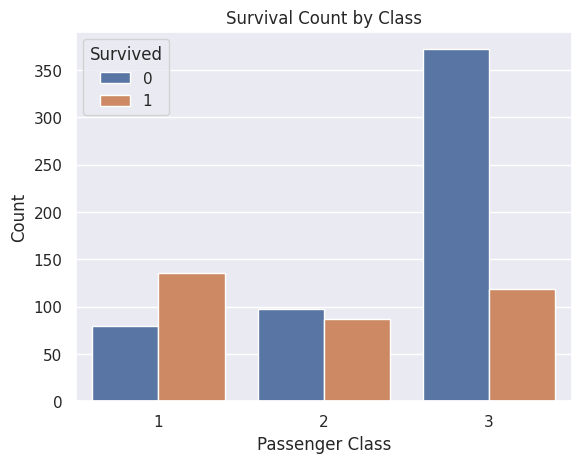

In [ ]:
# Bar Plot - Survival Count by Class:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


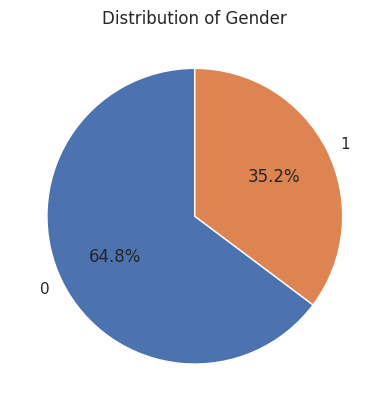

In [ ]:
# Pie Chart - Distribution of Gender:
gender_counts = train_df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.show()


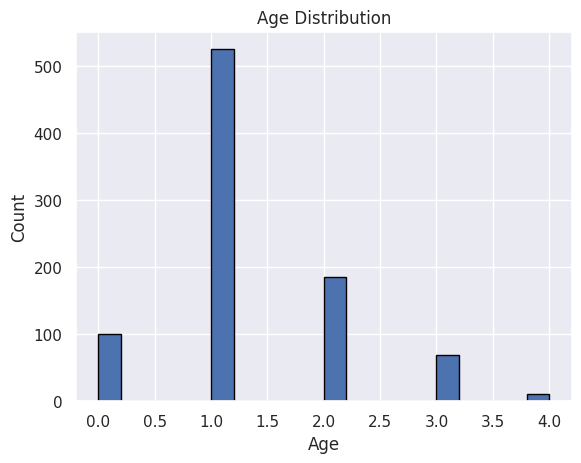

In [ ]:
# Histogram - Age Distribution:
plt.hist(train_df['Age'].dropna(), bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


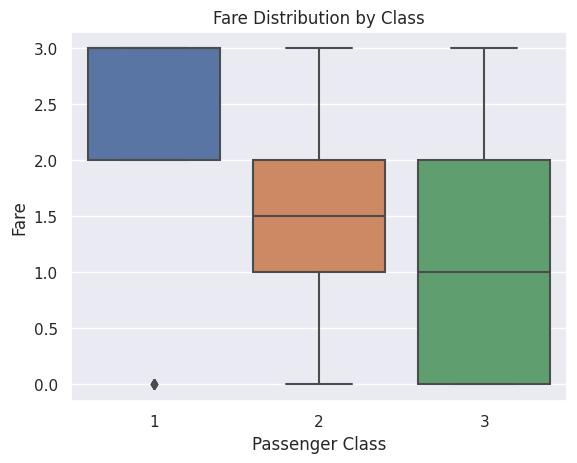

In [ ]:
# Box Plot - Fare Distribution by Class:
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


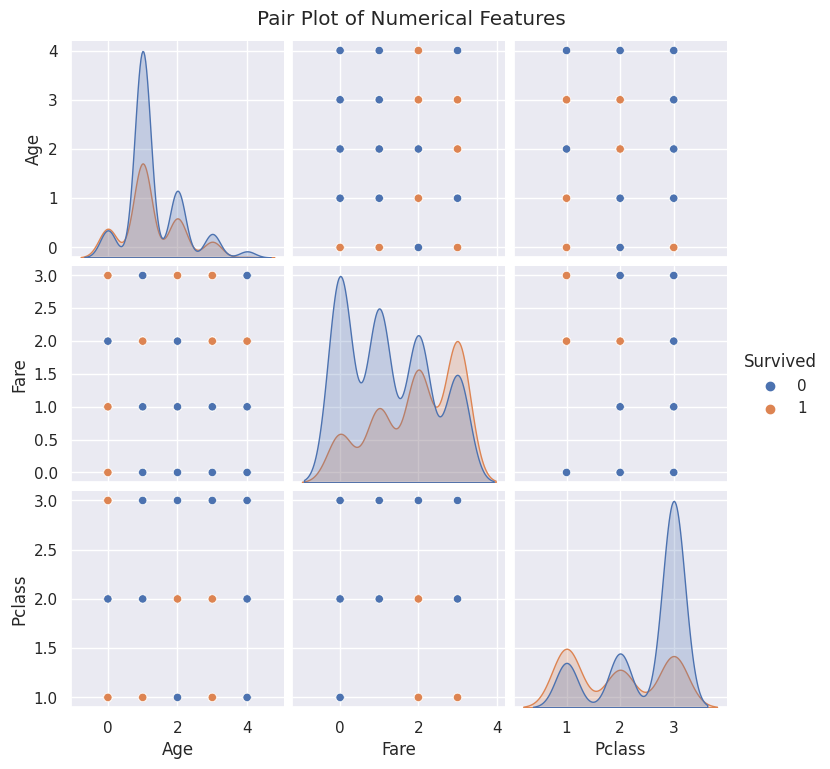

In [ ]:
# Pair Plot - Relationships Among Numerical Features:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


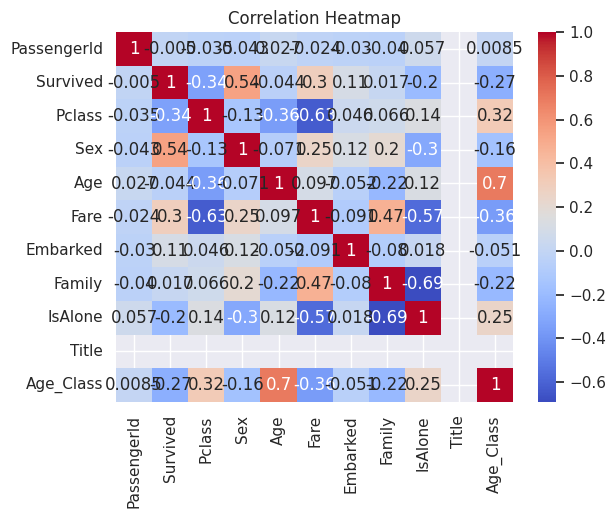

In [ ]:
# Correlation Heatmap:
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


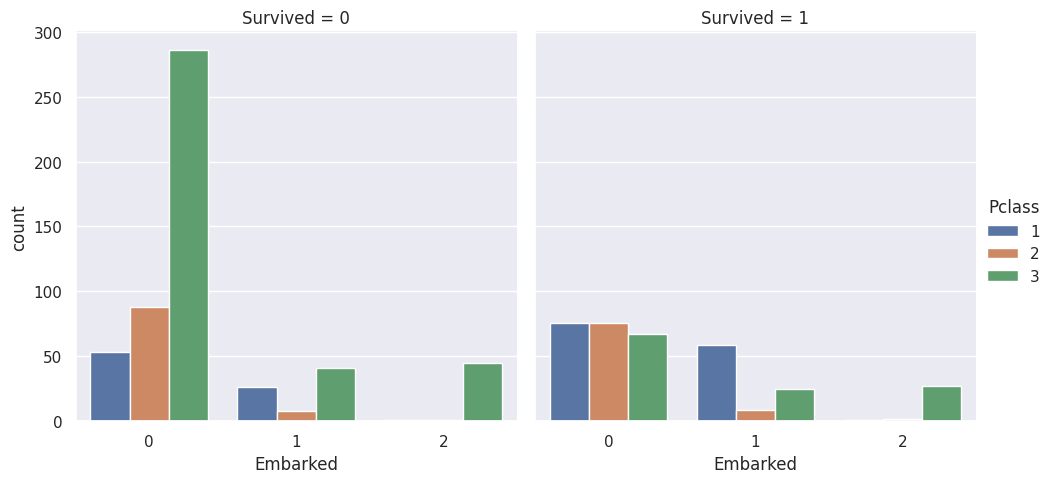

In [ ]:
# Factor Plot - Survival by Embarked and Class:
sns.catplot(x='Embarked', hue='Pclass', col='Survived', data=train_df, kind='count')


In [ ]:
# !pip install dash

In [ ]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Read your data (replace with your actual data)
train_df = pd.read_csv('https://raw.githubusercontent.com/9394113857/Data-Sets/raghu/train.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Titanic Dataset Interactive Dashboard"),

    dcc.Dropdown(
        id='class-dropdown',
        options=[
            {'label': 'First Class', 'value': 1},
            {'label': 'Second Class', 'value': 2},
            {'label': 'Third Class', 'value': 3}
        ],
        value=1,
        multi=False
    ),

    dcc.Graph(id='age-vs-fare'),
    dcc.Graph(id='survival-by-sex')
])

# Define callbacks to update charts based on dropdown selection
@app.callback(
    [Output('age-vs-fare', 'figure'), Output('survival-by-sex', 'figure')],
    [Input('class-dropdown', 'value')]
)
def update_charts(selected_class):
    filtered_df = train_df[train_df['Pclass'] == selected_class]

    age_vs_fare = px.scatter(filtered_df, x='Age', y='Fare', color='Survived',
                             title=f'Age vs Fare for Class {selected_class}')

    survival_by_sex = px.histogram(filtered_df, x='Sex', color='Survived', barmode='group',
                                   title=f'Survival by Sex for Class {selected_class}')

    return age_vs_fare, survival_by_sex

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>